# **# INRIA Holidays Content-Based Image Retrieval**
___


```Tugas Kedua | Temu Kembali Citra | Ir. Agus Eko Minarno, S.Kom., M.Kom. IPM.```

###### **Tujuan :**
```Implementasi Image Retrieval Menggunakan Python```

###### **Kelompok :**
```Yusril Aminuddin (201910370311366) | Irfan Azhari (201910370311388)```

##### **1. Prepare Dataset**
```Mempersiapkan dataset untuk dilatih```

In [24]:
# change directory to /tmp untuk konsistensi
%cd /tmp/

/tmp


In [4]:
# download dataset animals dan masukkan kedalam directory tmp google collab
!wget --no-check-certificate  \
ftp://ftp.inrialpes.fr/pub/lear/douze/data/jpg1.tar.gz \
-O dataset.tar.gz

--2022-11-11 07:36:56--  ftp://ftp.inrialpes.fr/pub/lear/douze/data/jpg1.tar.gz
           => ‘dataset.tar.gz’
Resolving ftp.inrialpes.fr (ftp.inrialpes.fr)... 194.199.18.221
Connecting to ftp.inrialpes.fr (ftp.inrialpes.fr)|194.199.18.221|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/lear/douze/data ... done.
==> SIZE jpg1.tar.gz ... 1141827194
==> PASV ... done.    ==> RETR jpg1.tar.gz ... done.
Length: 1141827194 (1.1G) (unauthoritative)

jpg1.tar.gz         100%[===================>]   1.06G  8.02MB/s    in 2m 44s  

2022-11-11 07:39:42 (6.66 MB/s) - ‘dataset.tar.gz’ saved [1141827194]



In [21]:
# create dataset folder and unzip dataset
!mkdir dataset/
# !unzip dataset.zip -d /unzipped-folder

In [33]:
# extract dataset from unzipped folder and remove it, option --strip-components=1 is ignore root folder in archive
!tar -xzf dataset.tar.gz -C dataset/ --strip-components=1
# !rm -rf /unzipped-folder

In [34]:
# list dataset
!ls dataset/

100000.jpg  104802.jpg	109900.jpg  115101.jpg	120400.jpg  125200.jpg
100001.jpg  104900.jpg	109901.jpg  115200.jpg	120401.jpg  125201.jpg
100002.jpg  104901.jpg	110000.jpg  115201.jpg	120500.jpg  125202.jpg
100100.jpg  104902.jpg	110001.jpg  115300.jpg	120501.jpg  125203.jpg
100101.jpg  105000.jpg	110100.jpg  115301.jpg	120600.jpg  125300.jpg
100200.jpg  105001.jpg	110101.jpg  115400.jpg	120601.jpg  125301.jpg
100201.jpg  105002.jpg	110200.jpg  115401.jpg	120700.jpg  125400.jpg
100300.jpg  105100.jpg	110201.jpg  115500.jpg	120701.jpg  125401.jpg
100301.jpg  105101.jpg	110300.jpg  115501.jpg	120702.jpg  125500.jpg
100302.jpg  105102.jpg	110301.jpg  115600.jpg	120703.jpg  125501.jpg
100400.jpg  105103.jpg	110302.jpg  115601.jpg	120800.jpg  125600.jpg
100401.jpg  105104.jpg	110400.jpg  115602.jpg	120801.jpg  125601.jpg
100500.jpg  105200.jpg	110401.jpg  115700.jpg	120900.jpg  125700.jpg
100501.jpg  105201.jpg	110500.jpg  115701.jpg	120901.jpg  125701.jpg
100502.jpg  105300.jpg	110501.jpg 

##### **2. Data Prepocessing**
```Melatih dan menganalisa dataset, membuat model dari dataset yang sudah dilatih```

In [72]:
# import library yang dibutuhkan
import keras
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
import numpy as np
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
import matplotlib.pyplot as plt
from keras.models import Model
import os

In [73]:
# init model VGG16 dan menampilkan summary
model = VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [74]:
# membuat fungsi untuk load citra
def load_image(path):
    img = load_img(path, target_size=model.input_shape[1:3])
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


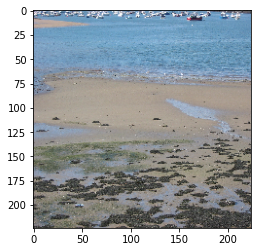

In [75]:
# menampilkan citra, shape dan tipe data nya
img, x = load_image("dataset/111000.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [76]:
# init predictions dari model VGG16 untuk menampilkan decode_predictions
predictions = model.predict(x)

for _, pred, prob in decode_predictions(predictions)[0]:
    print("diprediksi %s dengan kemungkinan %0.3f" % (pred, prob))

35363/35363 [==============================] - 0s 0us/step
diprediksi sandbar dengan kemungkinan 0.565
diprediksi seashore dengan kemungkinan 0.307
diprediksi promontory dengan kemungkinan 0.043
diprediksi lakeside dengan kemungkinan 0.020
diprediksi breakwater dengan kemungkinan 0.008


In [77]:
# init feature_extractor dari model VGG16 dan menampilkan summary
feature_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feature_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

1/1 [==============================] - 0s 244ms/step


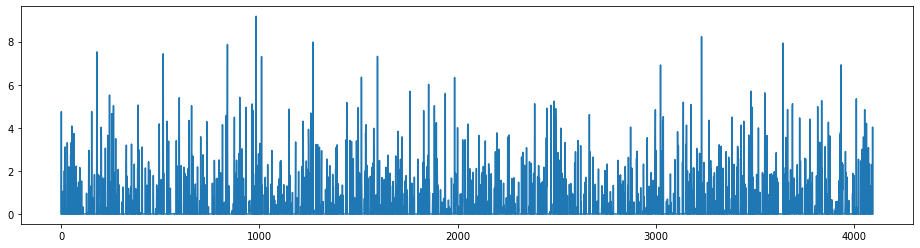

In [78]:
# menampilkan citra, ektraksi feature dan memvisualisasikan nya
img, x = load_image("dataset/111000.jpg")
feature = feature_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feature[0])

In [79]:
# check total citra yang bisa di analisa
images_path = "dataset/"
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]

print("terdapat %d citra yang bisa di analisa" % len(images))

terdapat 812 citra yang bisa di analisa


In [82]:
# list untuk menyimpan fetures hasil proses ekstraksi dari semua citra dataset yang didapat dari feature_extractor (VGG16)
dataset_features = []

for i, image_path in enumerate(images):
    if i % 10 == 0:
        print("menganalisa citra %d / %d." % (i, len(images)))

    img, x = load_image(image_path);
    feat = feature_extractor.predict(x)[0]
    dataset_features.append(feat)

print("selesai meng-ekstrak feature untuk %d citra" % len(images))

menganalisa citra 0 / 812.
1/1 [==============================] - 0s 18ms/step
menganalisa citra 10 / 812.
1/1 [==============================] - 0s 17ms/step
menganalisa citra 20 / 812.
1/1 [==============================] - 0s 17ms/step
menganalisa citra 30 / 812.
1/1 [==============================] - 0s 17ms/step
menganalisa citra 40 / 812.
1/1 [==============================] - 0s 18ms/step
menganalisa citra 50 / 812.
1/1 [==============================] - 0s 16ms/step
menganalisa citra 60 / 812.
1/1 [==============================] - 0s 16ms/step
menganalisa citra 70 / 812.
1/1 [==============================] - 0s 20ms/step
menganalisa citra 80 / 812.
1/1 [==============================] - 0s 16ms/step
menganalisa citra 90 / 812.
1/1 [==============================] - 0s 16ms/step
menganalisa citra 100 / 812.
1/1 [==============================] - 0s 16ms/step
menganalisa citra 110 / 812.
1/1 [==============================] - 0s 19ms/step
menganalisa citra 120 / 812.
1/1 [=====

##### **3. Model Evaluation**
```Evaluasi dari model yang telah dibuat, testing model```

In [83]:
# import library yang diperlukan
from sklearn.decomposition import PCA
import random
from scipy.spatial import distance

In [84]:
# init final_dataset_features, pca dan fitting final_dataset_features
final_dataset_features = np.array(dataset_features)
pca = PCA(n_components=300)
pca.fit(final_dataset_features)

PCA(n_components=300)

In [85]:
# transform dari final_dataset_features ke pca_features
pca_features = pca.transform(final_dataset_features)

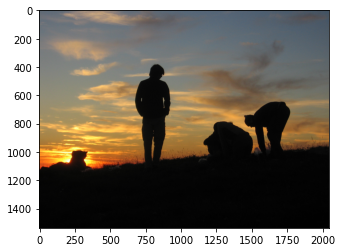

In [87]:
# pick random citra dan tes menampilkan nya
query_image_idx = int(len(images) * random.random())
img = load_img(images[query_image_idx])

plt.imshow(img)

In [88]:
# init query yang serupa untuk mencari query yang terdekat
similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [89]:
# init query yang terdekat dari query yang serupa
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

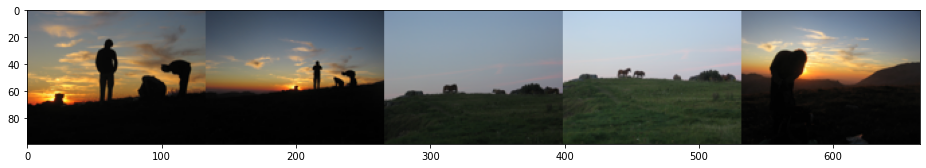

In [90]:
# testing query, dan menampilkan hasil dalam satu citra gabungan
concatenate_test = []

for idx in idx_closest:
    img = load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    concatenate_test.append(img)

concatenated_image = np.concatenate([np.asarray(t) for t in concatenate_test], axis=1)

plt.figure(figsize = (16,12))
plt.imshow(concatenated_image)

In [92]:
# membuat fungsi get_closest_images dari query index acak dan fungsi penggabungan citra
def get_closest_images(query_image_idx, num_results=10):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, closest_test_height):
    closest_test = []
    for idx in indexes:
        img = load_img(images[idx])
        img = img.resize((int(img.width * closest_test_height / img.height), closest_test_height))
        closest_test.append(img)
    concatenated_image = np.concatenate([np.asarray(t) for t in closest_test], axis=1)
    return concatenated_image

Text(0.5, 1.0, 'hasil akhir berikut citra penggabungan citra')

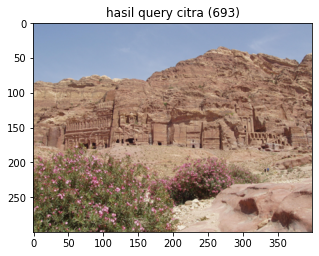

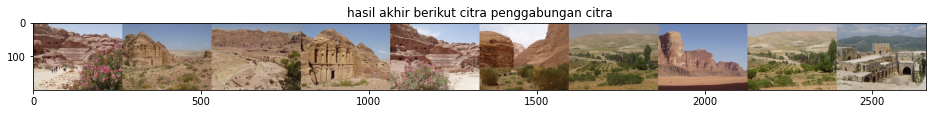

In [93]:
# test cbir dan menampilkannya (hasil query dan hasil penggabungan gambar)
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("hasil query citra (%d)" % query_image_idx)

plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("hasil akhir berikut citra penggabungan citra")

##### **4. Image Retrieval Testing**
```Live test dari citra yang diupload dan menampilkan hasil nya```

In [94]:
# import library yang dibutuhkan
from google.colab import files
from keras.preprocessing import image

Saving 100000.jpg to 100000.jpg
1/1 [==============================] - 0s 19ms/step


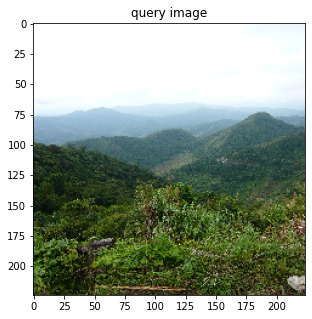

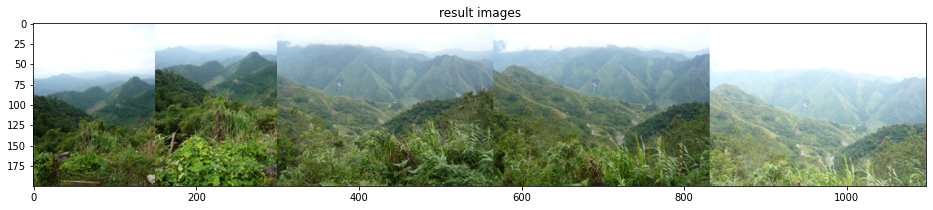

In [95]:
# unggah citra, proses feature ekstraksi dan pca, proses jarak terdekat, proses akhir yang digabungkan
uploaded = files.upload()
for fn in uploaded.keys():
  path = fn

new_image, x = load_image(path)
new_features = feature_extractor.predict(x)
new_pca_features = pca.transform(new_features)[0]

distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]  # grab first 5
results_image = get_concatenated_images(idx_closest, 200)

plt.figure(figsize = (5,5))
plt.imshow(new_image)
plt.title("query image")

plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

os.remove(path)